PROBLEM STATEMENT

1. TO BUILD A MODEL THAT PREDICT AND FLAG FRAUDULENT TRANSACTION 





THE DATASET WAS GOTTEN FROM KAGGLE

About Dataset
The below column reference:
1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

IMPORT ALL LIBARIES ,OS AND READ YOUR DATASET 

In [96]:
#Import Neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [97]:
#import operating system
import os
#Access the Location or File path
path ="/Users\BUNMI\Desktop"
os.chdir(path)
os.getcwd()

'c:\\Users\\BUNMI\\Desktop'

In [98]:
#load fraud dataset 
fraud_data = pd.read_csv('frauddataset.csv')
#Read the first 4 Rows
fraud_data.tail(4)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


DATA WRANGLING AND CLEANING


1. checking the datatype  of variable
1. Checking out for the null values
2. checking for the outlier within the columns.


In [99]:
#view the shape of the dataset
fraud_data.shape

(6362620, 11)

In [100]:
#checking the information of Dataset
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [101]:
#checking for null values in dataset
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [102]:
#summary of statiscal of categorical column
fraud_data.describe(include=[object])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


EXPLORATORY DATA ANALYSIS(EDA)



1. EDA on numerical columns

In [103]:
#function to extract numerical column from the data
numerical=[]
for col in fraud_data:
    if fraud_data[col].dtype != 'object':
        numerical.append(col)

#remove target variable
numerical.remove('isFraud')

print("These are the numerical variable:",numerical)


These are the numerical variable: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


In [104]:
#checking the number of unique values in each of the numerical columns
holder ={}
for i in list(numerical):
    holder[i]= fraud_data[i].value_counts().shape[0]

pd.DataFrame(holder,index =['unique Values'])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
unique Values,743,5316900,1845844,2682586,3614697,3555499,2


In [105]:
namefraud=fraud_data[['isFraud','nameDest']].groupby(['isFraud'])
namefraud.get_group(1)

,isFraud,nameDest
2,1,C553264065
3,1,C38997010
251,1,C972765878
252,1,C1007251739
680,1,C1848415041
...,...,...
6362615,1,C776919290
6362616,1,C1881841831
6362617,1,C1365125890
6362618,1,C2080388513


2. EDA ON THE TARGET VARIABLE (ISFRAUD)

<AxesSubplot: ylabel='count'>

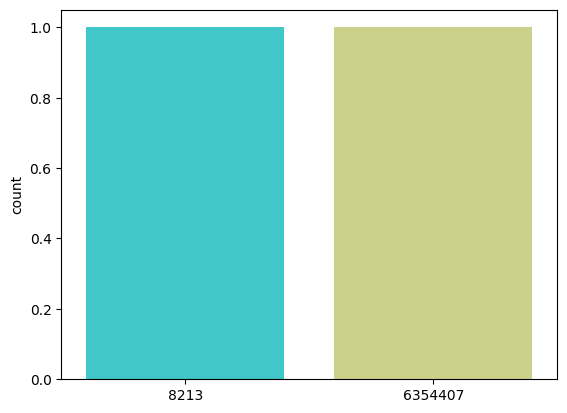

In [106]:

#group the dataset by isFraud
fraudGroup= fraud_data.groupby('isFraud')
##viewing the isFraud by size by plotting a countplot to show the size of Transactions that are fraudentlent 
sns.countplot(x =fraudGroup.size(),data =fraud_data,palette='rainbow' )

In [107]:

#call a get group function fraupgroup
fraud_groupdata=fraudGroup.get_group(1)
fraud_groupdata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


ANALYZING THE PERCENTAGE OF EACH TRANSACTIONS MODE / AMOUNT AND COUNT OF FRAUDULENT TRASANCTION 

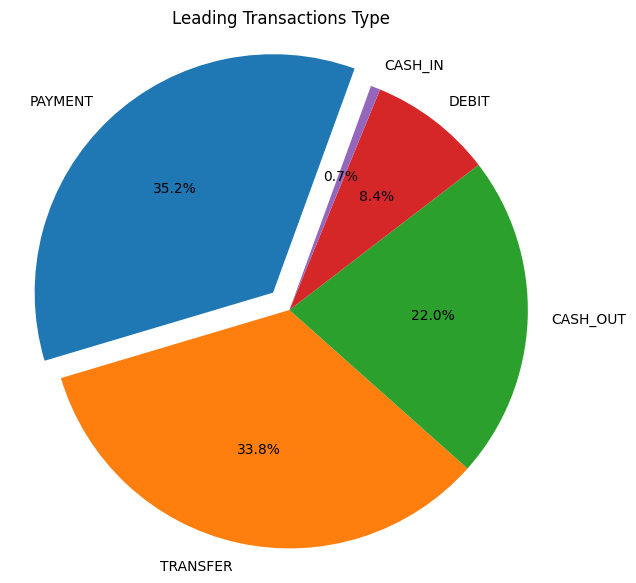

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
Fig 1


In [108]:
#plot piechart
#set the pie chart plot properties
plt.figure(figsize=(7,7))#set figure size
values = fraud_data['type'].value_counts() #Counting the unique values frequency
labels =fraud_data['type'].unique().tolist() #creating the unique value labels
explode = (0.1, 0, 0, 0,0) #Explode the first slice

#create the pie chart with included exploding slice
plt.pie(values,labels= labels,explode =explode,autopct ='%1.1f%%',startangle=70)

#set axis equal to draw pie as circle
plt.axis('equal')

#set title of the pie chart
plt.title('Leading Transactions Type')
plt.show()#print the pie.chart
print(values) #print our values
print('Fig 1')


OBSERVATION:The Pie plot shows that mode of Trasanction with highest value counts is Payment with percentage of 35.2% of the total dataset

In [109]:
#Value count of is fraud
fraud_data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [110]:
#checking the Top Transaction Type awith the  Amount
amount1= fraud_data[['type','isFraud','amount']].value_counts().iloc[:15]
#crate a dataframe
Amount_type= pd.DataFrame(amount1)
Amount_type

0
type     isFraud amount           
TRANSFER 0       10000000.00  2920
         1       10000000.00   145
CASH_OUT 1       10000000.00   142
CASH_IN  0       10000.00       84
                 5000.00        77
                 15000.00       67
                 500.00         62
                 100000.00      42
                 21500.00       37
CASH_OUT 0       120000.00      29
CASH_IN  0       135000.00      20
CASH_OUT 1       0.00           16
PAYMENT  0       2431.38         9
                 4648.12         9
                 6765.71         8

Fig 2


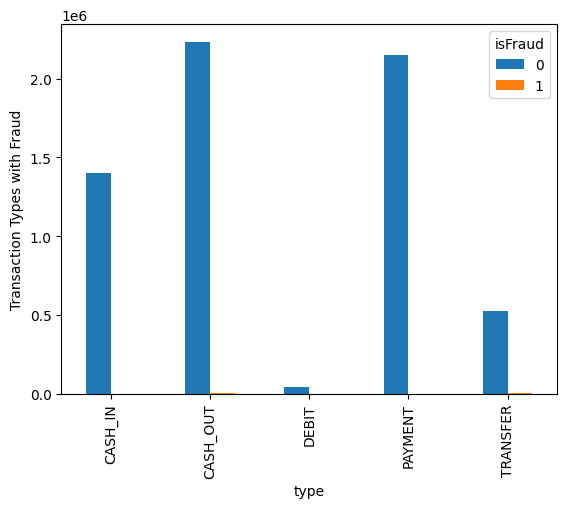

In [111]:
#plot a bar chat to view transaction Type through which fradulent trasactions are carried out
fraud_data[['type','isFraud']].groupby(['type']).value_counts().unstack().plot.bar(ylabel='Transaction Types with Fraud')
print('Fig 2')


OBSERVATION 1 :TRANSFER has the highest count of transaction with 3065 ,followed by CASHOUT,which means this is the most/frequent use platform for most transaction.

2. The above graph shows that medium through which fradulent transactions are carried out is Transfer and CASH OUT

Recommendation -There's need to review the process in Transfer and Cashout,more data is required for further Recommendation.

OBSERVATION:TRANSFER has the highest count of transaction with 3065 ,followed by CASHOUT 

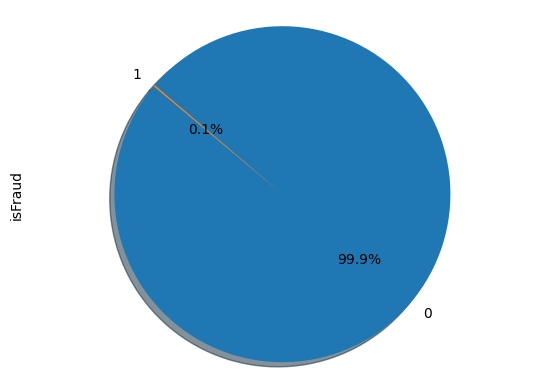

Fig 3


In [112]:
#plot a piechart to see the percentage of Non fraud and Fraud transaction
# #groupby isfraud,calling a count function on it 
fraud= fraud_data.groupby('isFraud')['isFraud'].count()
#give the label as 0,1
labels= '0','1'
#plot a pie chart
fraud.plot.pie(y=fraud.values,labels=labels,autopct ='%1.1f%%',shadow =True,startangle =140)
plt.axis('equal')
plt.show();
print('Fig 3')

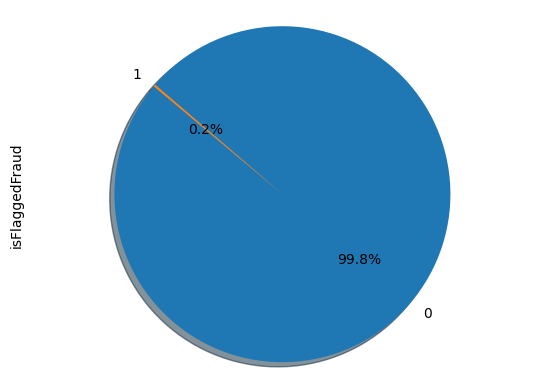

Fig 4


In [113]:
#plot a graph to show the percentage of fraudulent transaction that was Flagged
typef=fraud_data[fraud_data['isFraud']==1]['isFlaggedFraud'].value_counts()
#give the label as 0,1
labels = '0','1'
#plot a pie chart
typef.plot.pie(y=typef.values, labels=labels,autopct ='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show();
print('Fig 4')

OBSERVATION : Above piechart shows that only 0.2% of the Fraudulent Transaction were being flagged,

RECOMMENDATION -  A SOPPHISTICATED DETECTING MODEL IS REQUIRED WHICH IS THE AIM OF THIS PROJECT,There is need for defence system that could identify,Flag and disrupt the process of Fradulent Transaction.

In [114]:
#Transaction Amount for Fradulent and Non Fradulent 
sumtotal=fraud_data.groupby('isFraud')['amount'].sum()

amount_data= pd.DataFrame(sumtotal)
amount_data

,amount
isFraud,
0,1.132337e+12
1,1.205642e+10


Fig 5


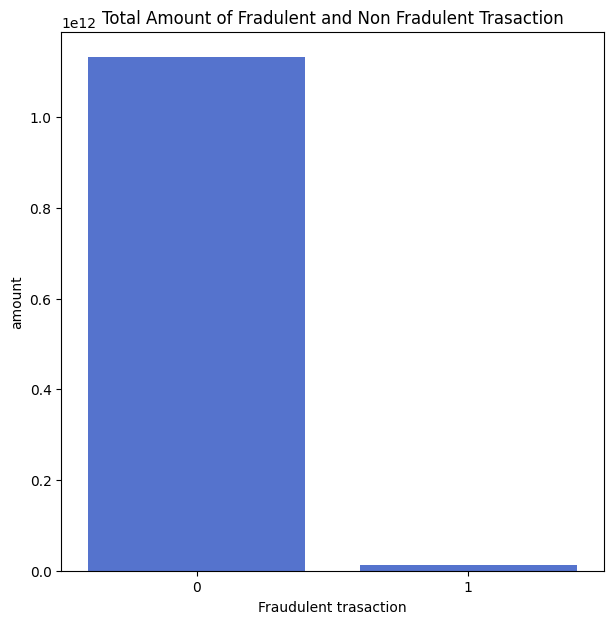

In [115]:
#plot a barplot to visualise the difference between the Total Amount of Fradulent and Non Fradulent Trasaction 
plt.figure(figsize=(7,7))
sns.barplot(x=amount_data.index, y=amount_data['amount'], data=amount_data, color='royalblue')
plt.xlabel('Fraudulent trasaction')
plt.title('Total Amount of Fradulent and Non Fradulent Trasaction')
print('Fig 5')

Fig 6


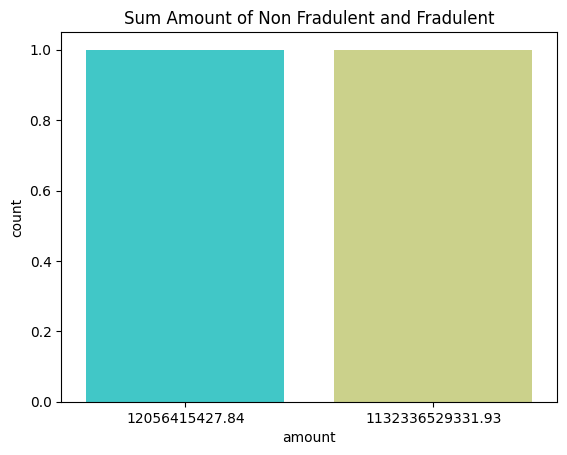

In [116]:
#groupby the column amount with isfraud
sumtotal=fraud_data.groupby('isFraud')['amount'].sum()
#visualizing the Amount Fraudulent against
sns.countplot(x =sumtotal,data =fraud_data,palette='rainbow' ).set(title='Sum Amount of Non Fradulent and Fradulent')
print('Fig 6')

OBSERVATION- The number of fradulent transaction has a total of 1,132,336,529,331.93,which is 99% of the Amount and the fradulent transaction is 12,056,415,427.84 marking  0.1% of the The Total Amount. as seen above

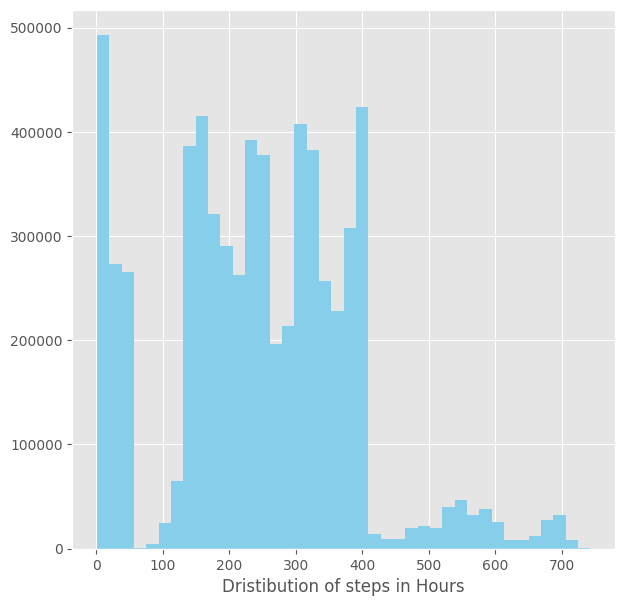

Fig 7


In [117]:
#plot histogram(checking the probability distribution of steps)
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.hist(fraud_data['step'],bins = 40,color='skyblue')
plt.xlabel('Dristibution of steps in Hours')
# plt.ylabel('No of steps')
plt.show()
print('Fig 7')

OBSERVATION:The Distribution of most hour falls between 120 -405,The highest hour this fraudulent transaction were excuted is within 1 - 10 hours.

FEATURE ENGINEERING 

In [118]:
#Feature Engineering on the column type(Encoding the categorical variable using Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fraud_data['type']=le.fit_transform(fraud_data['type'].values)
fraud_data['nameOrig']=le.fit_transform(fraud_data['nameOrig'].values)
fraud_data['nameDest']=le.fit_transform(fraud_data['nameDest'].values)

EDA 3-ANALYSING THE CORRELATION FEATURES

In [119]:
#use describe to statically explore eachthe variables
fraud_data.corr()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


<AxesSubplot: >

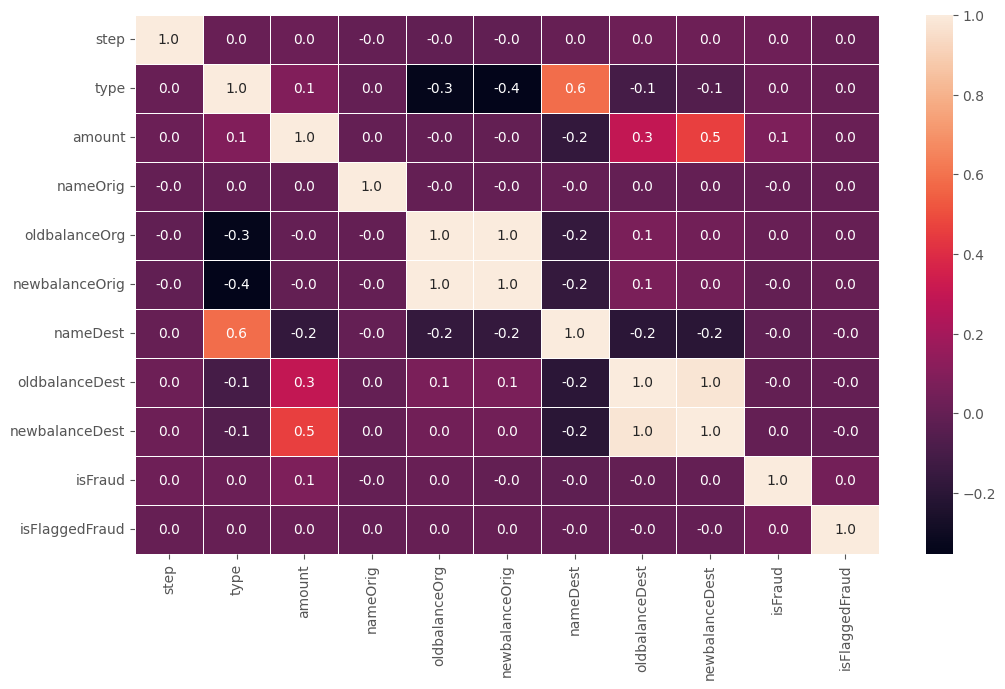

In [120]:
#examine the correlation betwwen relevant variables
Correlation=fraud_data.corr()
#plot a scatter plot to show corrolation between variable
plt.figure(figsize=(12,7))
sns.heatmap(Correlation,annot=True,linewidths=.5, fmt= '.1f')

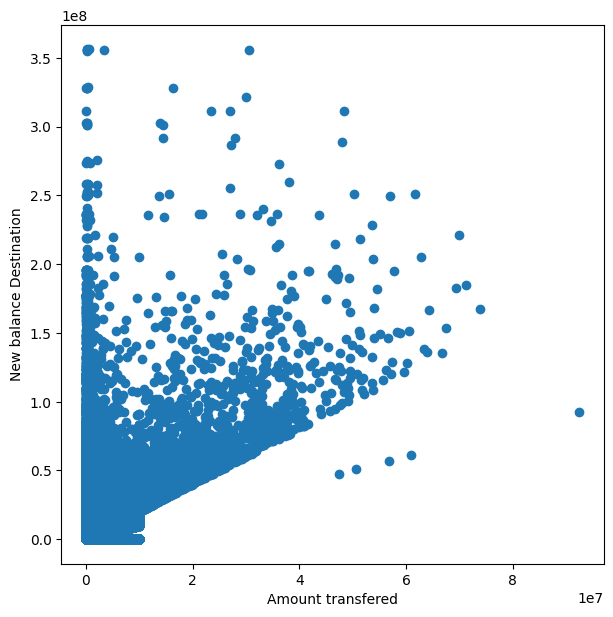

In [121]:
# This to check the Relationship between Amount and NewbalanceDest
#plot scatter plot to show Correlation between variables
style.use('default')
plt.figure(figsize=(7,7))
plt.scatter(x = fraud_data['amount'],y =fraud_data['newbalanceDest'])
plt.xlabel("Amount transfered")
plt.ylabel("New balance Destination")
plt.show()

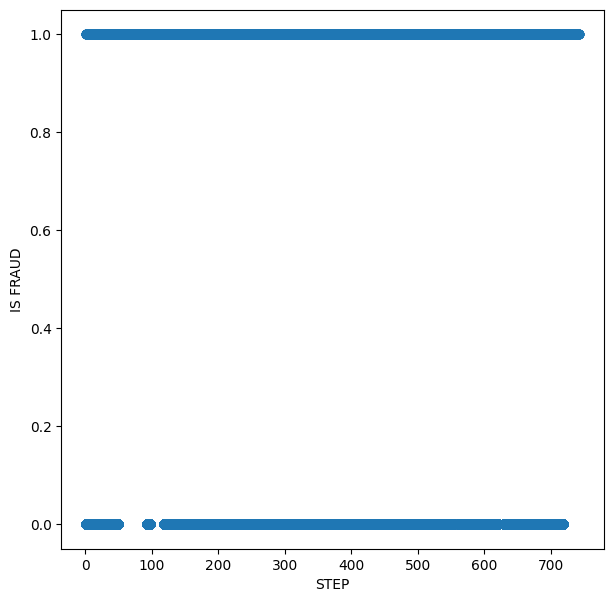

In [122]:
# This to check the Relationship between Amount and isFraud
#plot scatter plot to show Correlation between variables
style.use('default')
plt.figure(figsize=(7,7))
plt.scatter(x = fraud_data['step'],y =fraud_data['isFraud'])
plt.xlabel("STEP")
plt.ylabel("IS FRAUD")
plt.show()

In [123]:
# import seaborn as sns
# sns.regplot(x='amount',y= 'isFraud' ,data =fraud_data)

MODEL PREDICTION TO DETECT FRADULENT TRANSACTION

PREPARE THE INDEPEDENT AND DEPENDENT FEATURE

In [124]:
# #Prepare the Independent and Dependent features
x= fraud_data.drop(['isFraud'],axis= 'columns')
y= fraud_data['isFraud']


TRAIN/TEST SPLIT

In [125]:
#We will import “train_test_split” for train/test split and “cross_val_score” for k-fold cross-validation. “accuracy_score” is to evaluate the accuracy of the model in the train/test split method.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#split the features and responses into train and test portions
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [126]:
##standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

MODEL TRAINING -  LOGISTIC REGRESSION MODEL



In [127]:
#the Model used here is logistic Regression 
from sklearn.linear_model import LogisticRegression
#create an object
LRModel = LogisticRegression()
#fit the train dataset into the model
LRModel.fit(x_train,y_train)

LogisticRegression()

In [128]:
#checking for the co-efficient
print(LRModel.coef_)

[[ 7.08241450e-01  6.87493401e-01 -1.69156526e+00 -4.42463192e-02
   3.85565954e+01 -4.52069783e+01 -2.32679708e+00  1.08686211e+01
  -1.25246506e+01  1.48597896e-01]]


In [129]:

#check out the Intercept
print(LRModel.intercept_)

[-11.09429909]


In [130]:
#checking the Accuracy score 
LRModel.score(x_test,y_test)

0.9992188752432174

In [131]:
#on which parameters the model has been trained
LRModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [132]:
##prediction wwith Test Data
y_pred=LRModel.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ASSUMPTION- CHECKING THE PERFORMANCE

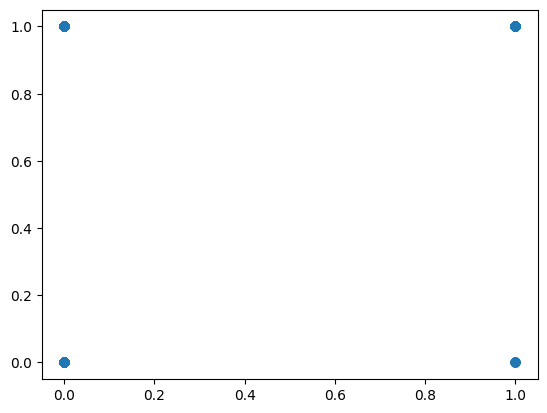

In [133]:
##plot a scatter plot for the prediction
plt.scatter(y_pred,y_test)

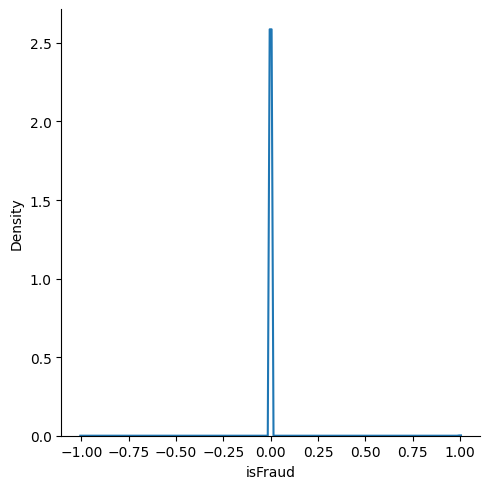

In [134]:
##Prediction with residual
#residual meanserror to y_test)
residuals=y_test-y_pred   #calculate residual
sns.displot(residuals,kind ='kde')

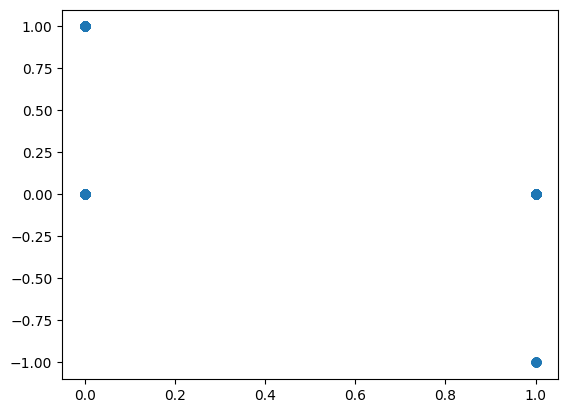

In [135]:
##Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [136]:
##using performance metrics to check the accuracy of the Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.0007811247567825832
0.0007811247567825832
0.027948609210166134


R SQUARE AND ADJUSTED R SQUARE 

In [137]:
from sklearn.metrics import r2_score 
score=r2_score(y_test,y_pred)
print(score)

0.3956963085990898


NEW DATA PREDICTION

In [138]:
#converting the dataframe into numpy
import numpy as np #import library 
sam =np.array(x)
sample =sam[6362618]
#reshape the new data and transformation of new data
scaler.transform(sam[6362618].reshape(1,-1))


array([[ 3.51047051e+00,  1.69294220e+00,  1.10679957e+00,
        -5.03533093e-01,  5.67799071e-03, -2.92358875e-01,
        -5.68833360e-01, -3.24045495e-01, -3.33520956e-01,
        -1.71665603e-03]])

In [139]:
#predicting the transformed New data 
LRModel.predict(scaler.transform(sam[6362618].reshape(1,-1)))

array([1], dtype=int64)

PICKLING THE MODEL FILE FOR DEPLOYMENT

In [140]:
#save the Model
import pickle #use to pickle the model
#convert to a pickle file in this object 
pickle.dump(LRModel,open('LRModel.pkl','wb'))
#load the Model
pickled_model=pickle.load(open('LRModel.pkl','rb'))
#prediction
pickled_model.predict(scaler.transform(sam[6362618].reshape(1,-1)))


array([1], dtype=int64)